# Baroclinic Eddy Energy Transfer
## Matt Watwood and Ian Grooms

In [1]:
using Pkg
#Pkg.add("FFTW")
#Pkg.add("PyPlot")
#Pkg.add("FileIO")
#Pkg.add("Distributions")
#Pkg.add("Random")
using FFTW, PyPlot, FileIO
using Random, Distributions

In [24]:
include("RK_Functions.jl")
include("Initialize.jl")
include("Psi.jl");
include("Explicit_RHS.jl")
include("Stocastic.jl")

spatial_localize (generic function with 1 method)

In [25]:
Setup_Psi()
setup_QG_RHS();
Create_Stoch_Pert(Int(Init.parameters.N_points/2+1), Init.parameters.N_points);

0.9440504838888637
0.3901628634628825
Stepping with size 0.05378588438236643
Stepping with size 0.05416689281304215
Stepping with size 0.05478600598833042
Stepping with size 0.0551243450967847
Stepping with size 0.05575913714102164
Stepping with size 0.05529670174811948
Stepping with size 0.05558250795075227
Stepping with size 0.052861440801641846
Stepping with size 0.054096850529027685
Stepping with size 0.056036488334732494
Stepping with size 0.05336066938961836
Stepping with size 0.05463359850981964
Stepping with size 0.05457435763294121
Stepping with size 0.055728938892897366
Stepping with size 0.05497534728087445
Stepping with size 0.05568085245067723
Stepping with size 0.051522350049528196
Stepping with size 0.05497273435033221
Stepping with size 0.053951771735760594
Stepping with size 0.05584946200193172
Stepping with size 0.056158561604941926
Stepping with size 0.05406488552705072
Stepping with size 0.05613779526243164
Stepping with size 0.056528458229208496
Stepping with size 

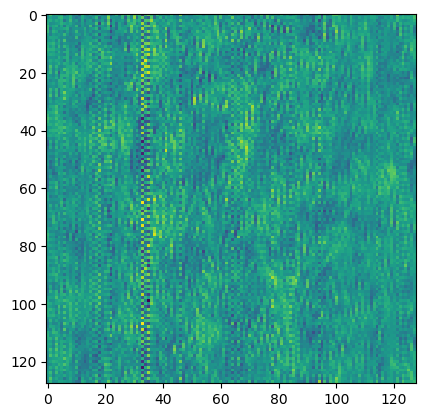

Stepping with size 0.05652584283449175
-0.06915841748046182
-0.07531519719803409


In [27]:
u_next = Init.q
dt_next = 0.01
println(Init.qp[1,1,1])
println(Init.qp[5,5,1])
for i in 1:15000
    u_next, dt_next = take_timestep_array(QG_RHS, Init.L, u_next, dt_next)
    if(i%500 ==0)
        println("Stepping with size ", dt_next)
        qp = FFTW.irfft(u_next, Init.parameters.N_points)
        imshow(qp[:,:,1])
    end
end
qp = FFTW.irfft(u_next, Init.parameters.N_points)
println(qp[1,1,1])
println(qp[5,5,1])

In [ ]:
u_next = Init.q
dt_next = 0.01
println(Init.qp[1,1,1])
println(Init.qp[5,5,1])
for i in 1:10
    u_next, dt_next = take_timestep_array(QG_RHS, Init.L, u_next, dt_next)
    if(i%100 ==0)
        println("Stepping with size ", dt_next)
    end
end
qp = FFTW.irfft(u_next, Init.parameters.N_points)
println(qp[1,1,1])
println(qp[5,5,1])

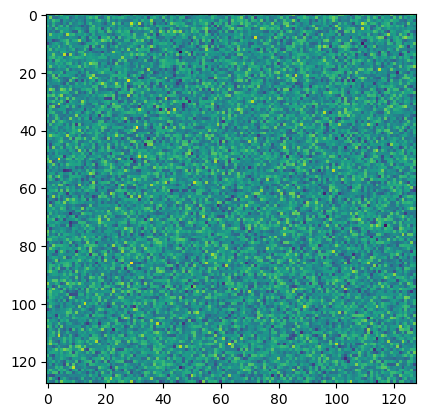

PyObject <matplotlib.image.AxesImage object at 0x0000000028DF59E8>

In [28]:
imshow(Init.qp[:,:,1])

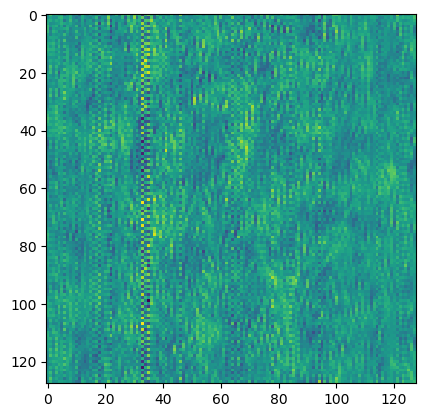

PyObject <matplotlib.image.AxesImage object at 0x0000000028E55F60>

In [29]:
imshow(qp[:,:,1])

In [40]:
using FFTW, PyPlot, FileIO, DelimitedFiles
using Random, Distributions

include("RK_Functions.jl")
include("Initialize.jl")
include("Psi.jl");
include("Explicit_RHS.jl")
include("Stocastic.jl")

Setup_Psi()
setup_QG_RHS();

u_next = Init.q
dt_next = 0.01
io = open("starting.txt","w")
writedlm(io,Init.qp[:,:,1])
close(io)
io = open("results.txt","w")
print(io,"Iter\t Timestep\n")
for i in 1:50
    u_next, dt_next = take_timestep_array(QG_RHS, Init.L, u_next, dt_next)
    if(i%5 ==0)
        print(io, string(i, "\t", dt_next, "\n"))
        #qp = FFTW.irfft(u_next, Init.parameters.N_points)
        #imshow(qp[:,:,1])
    end
end
close(io)
qp = FFTW.irfft(u_next, Init.parameters.N_points)
io = open("final_state.txt", "w")
writedlm(io, qp[:,:,1])
close(io)


In [41]:
using DelimitedFiles, PyPlot
start = readdlm("starting.txt", '\t', Float64, '\n')
finish = readdlm("final_state.txt", '\t', Float64, '\n')

128×128 Array{Float64,2}:
 -0.182679    0.44303     0.607346  …   0.188686    0.094021   -0.620581 
 -0.566062   -0.0223875   0.374083     -0.80184     0.617126   -0.200785 
  0.584542    0.192416    0.332183     -0.155065    0.584509    0.140141 
  0.467444   -0.289167    0.734578      0.284935    0.0922407   0.859407 
 -0.547566   -0.36613    -0.384112     -0.186532   -0.250577   -0.338636 
 -0.182961   -0.353564   -0.385455  …  -0.624793    0.248197   -0.233281 
 -0.762135    0.452368   -0.917343      0.968559   -0.65595    -1.5672   
  0.0246083  -0.0486766  -0.240664      0.640755   -0.441722    0.416545 
  0.0433989   0.0176659  -0.224602     -0.342901    0.298076   -0.418255 
  0.574701    0.504588   -0.445726     -1.91483    -0.514338   -0.0142294
  0.311237   -0.369791    0.208761  …  -0.482183    0.235296   -0.300288 
  0.0498558   0.267102    0.373952     -0.974788    0.803627   -0.186827 
 -0.946398    0.290695   -0.820756     -0.236759    0.234218    0.500382 
  ⋮         